In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank.csv')


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [5]:
df = pd.get_dummies(df,drop_first = True)

In [6]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis=1)
y = df['Exited']

In [15]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

In [17]:

X_res, y_res = SMOTE().fit_resample(X,y)

In [18]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

In [20]:

from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:

X_train

array([[ 0.7653585 , -0.90115933,  0.78930677, ..., -0.76300346,
         1.56842684, -1.22524855],
       [-0.67680044, -0.80093862,  1.15642926, ..., -0.76300346,
        -0.63758154,  0.81616093],
       [-1.32140179,  0.20126851,  0.78930677, ..., -0.76300346,
         1.56842684,  0.81616093],
       ...,
       [-1.28862545,  0.30148922,  1.52355175, ...,  1.31061004,
        -0.63758154, -1.22524855],
       [ 0.48129689, -1.00138004, -1.41342817, ..., -0.76300346,
        -0.63758154,  0.81616093],
       [ 1.63939422,  2.20568275, -1.41342817, ..., -0.76300346,
        -0.63758154, -1.22524855]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()

In [26]:
log.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred1)


0.7847667950363714

In [29]:
recall_score(y_test, y_pred1)

0.7847667950363714

In [30]:

f1_score(y_test,y_pred1)

0.7704263810123924

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM model (you can set kernel='linear' or other params as needed)
svm_model = SVC()

# Train model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred2 = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8332
Precision: 0.8325
Recall: 0.8250
F1 Score: 0.8287


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN with default parameters (you can specify n_neighbors etc.)
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred3 = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8116
Precision: 0.7946
Recall: 0.8293
F1 Score: 0.8116


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree classifier (you can set max_depth, criterion etc.)
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred7 = dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred7)
precision = precision_score(y_test, y_pred7)
recall = recall_score(y_test, y_pred7)
f1 = f1_score(y_test, y_pred7)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.7972
Precision: 0.7743
Recall: 0.8263
F1 Score: 0.7994


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest (you can set n_estimators, max_depth, etc.)
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred4 = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8566
Precision: 0.8503
Recall: 0.8579
F1 Score: 0.8541


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Gradient Boosting Classifier (adjust parameters as needed)
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred5 = gb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred5)
precision = precision_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8317
Precision: 0.8314
Recall: 0.8228
F1 Score: 0.8271


In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost classifier (you can pass hyperparameters like max_depth, learning_rate etc.)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred6 = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8533
Precision: 0.8457
Recall: 0.8562
F1 Score: 0.8509


In [46]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [47]:
performance_summary

,Model,ACC
0,LR,0.771243
1,SVC,0.833194
2,KNN,0.811637
3,DT,0.856635
4,RF,0.831729
5,GBC,0.853286
6,XGB,0.797195


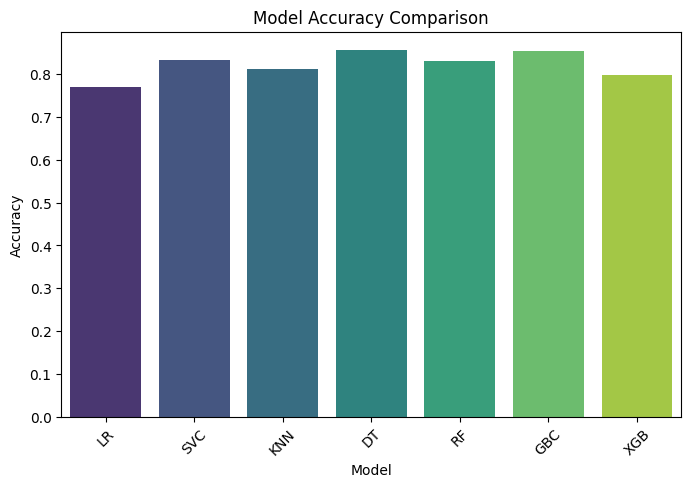

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='ACC', data=performance_summary, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [50]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [51]:
performance_summary

,Model,PRECISION
0,LR,0.756601
1,SVC,0.832470
2,KNN,0.794588
3,DT,0.850297
4,RF,0.831388
5,GBC,0.845731
6,XGB,0.845731


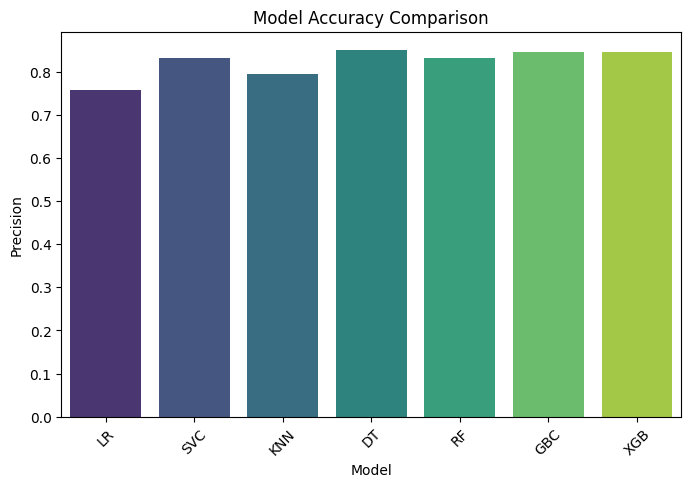

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='PRECISION', data=performance_summary, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()